In [1]:
import pandas as pd
import numpy as np

import calendar
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn import model_selection
from sklearn.model_selection import GridSearchCV,KFold,train_test_split,cross_val_score,cross_validate

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error, r2_score,recall_score,mean_squared_error

%matplotlib inline 
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv(r"Dataset/train.csv")
train_target=pd.read_csv(r"Dataset/train_label.csv",header=None)
train['Total_booking']=train_target

In [3]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.76,77,16.9979,504


In [4]:
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


In [5]:
train.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
dtype: object

# 1.Removing Outliers using standard Deviation only target variable

In [6]:
import numpy as np
import pandas as pd
outliers=[]

def detect_outlier(data,column_name):
    data_std = data[column_name].std()
    data_mean = np.mean(data[column_name])
    outliers_cut_off = data_std * 3
    
    lower_limit  = data_mean - outliers_cut_off 
    upper_limit = data_mean + outliers_cut_off 
    
    
    # Generate outliers
    outliers=[]
    index_outliers=[]
    for outlier in data[column_name]:
        if outlier > upper_limit or outlier < lower_limit:
            outliers.append(outlier)
    
    return outliers

print("atemp column outliers :",len(detect_outlier(train,'atemp')))
print("temp column outliers :",len(detect_outlier(train,'temp')))
print("humidity column outliers :",len(detect_outlier(train,'humidity')))
print("windspeed column outliers :",len(detect_outlier(train,'windspeed')))

atemp column outliers : 0
temp column outliers : 0
humidity column outliers : 18
windspeed column outliers : 48


### Replacing outliers with mean

In [7]:
humidity_mean=np.mean(train['humidity'])
humidity_std = train['humidity'].std()
outliers_cut_off=humidity_std * 3
lower_limit  = humidity_mean - outliers_cut_off 
upper_limit = humidity_mean + outliers_cut_off

train['humidity'] = train['humidity'].apply(lambda x : humidity_mean if x > upper_limit or x < lower_limit else x )

windspeed_mean=np.mean(train['windspeed'])
windspeed_std = train['windspeed'].std()
outliers_cut_off=windspeed_std * 3
lower_limit  = windspeed_mean - outliers_cut_off 
upper_limit = windspeed_mean + outliers_cut_off

train['windspeed'] = train['windspeed'].apply(lambda x : windspeed_mean if x > upper_limit or x < lower_limit else x )

.

# 2.Missing Value Analysis

In [8]:
train.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64

#### AS there are no missing values, the data remains same. 

# 3.Correlation Analysis

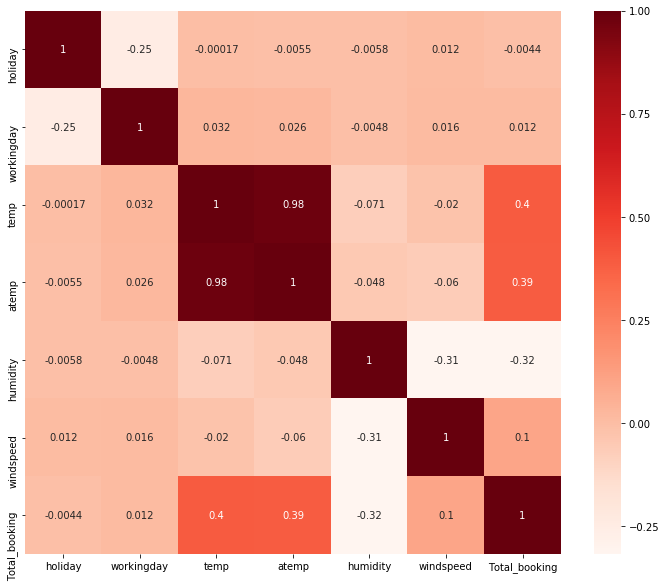

In [9]:
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
train.corr()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking
holiday,1.000000,-0.249755,-0.000165,-0.005526,-0.005765,0.011886,-0.004391
workingday,-0.249755,1.000000,0.032189,0.026168,-0.004783,0.015633,0.012285
temp,-0.000165,0.032189,1.000000,0.984035,-0.070518,-0.019887,0.397456
atemp,-0.005526,0.026168,0.984035,1.000000,-0.047711,-0.060410,0.392754
humidity,-0.005765,-0.004783,-0.070518,-0.047711,1.000000,-0.314909,-0.317318
windspeed,0.011886,0.015633,-0.019887,-0.060410,-0.314909,1.000000,0.099752
Total_booking,-0.004391,0.012285,0.397456,0.392754,-0.317318,0.099752,1.000000


#### 1. We can observe that humidity has negative co-relation with total booking which tells us that if humidity increase cab bookings decreases. 
#### 2. The columns "temp" and "atemp" has highest posive co-relation with total booking.
#### 3. Windspeed also has a positive co-relation with total_booking.
#### 4. "Workingday" and "holiday" has negative co-relation which tell us that there not many holidays during the week. 
#### 5. The columns "temp" and "atemp" are highly co-related with each other aswell.
#### 6. There is a negative co-relation between windspeed and humidity.

# 4.Feature Engineering and extracting insights of every column with repest to target column.

In [11]:
train.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity         float64
windspeed        float64
Total_booking      int64
dtype: object

# Date Column
#### Extracting Day of the week and month from date column for better visualization analysis. Creating 2 new columns with month and time from the date column

In [12]:
train['date']=train.datetime.apply(lambda x:x.split()[0])
train['day']=train.date.apply(lambda x:calendar.day_name[datetime.datetime.strptime(x, "%m/%d/%Y").weekday()])
train['month']=train.date.apply(lambda x:calendar.month_name[datetime.datetime.strptime(x, "%m/%d/%Y").month])
train['time']=train.datetime.apply(lambda x:x.split()[1].split(":")[0])
train['year']=train.date.apply(lambda x:x.split("/")[2])


### Year vs Total_booking

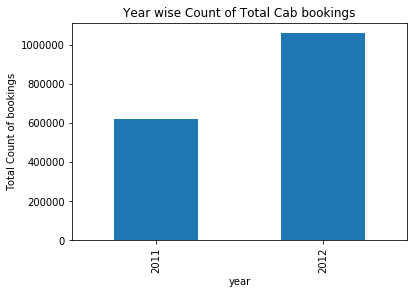

In [13]:
var = train.groupby(['year']).Total_booking.sum() #grouped sum of sales at Gender level
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Count of bookings')
ax1.set_title("Year wise Count of Total Cab bookings")
var.plot(kind='bar')

#### 2012 has more booking count than 2011 which can be due to many reasons like good marketing strategy , popularity, price drop etc

In [14]:
train['year']=train['year'].astype('str').astype('int')

### Day vs Total_booking

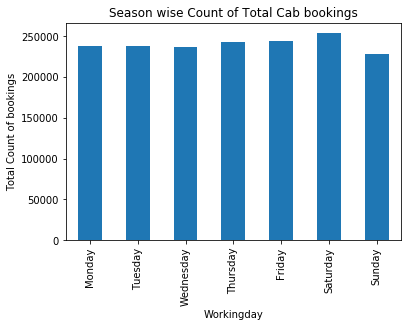

In [15]:
week=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
var = train.groupby(pd.Categorical(train['day'], categories=week, ordered=True)).Total_booking.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_ylabel('Total Count of bookings')
ax1.set_xlabel('Workingday')
ax1.set_title("Season wise Count of Total Cab bookings")
var.plot(kind='bar')

#### There is no significance difference in the total bookings count over the week. We can remove this column.

In [16]:
train['day']=train.datetime.apply(lambda x:x.split(' ')[0].split("/")[1])
train['day']=train['day'].astype('str').astype('int')

### Month vs Total_booking

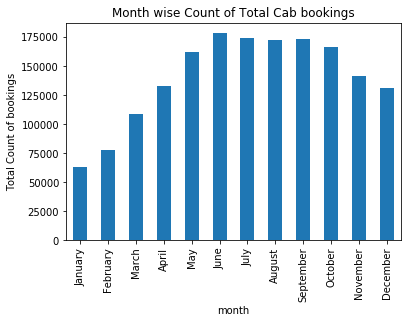

In [17]:
month=['January','February','March','April','May','June','July','August','September','October','November','December']
var = train.groupby(pd.Categorical(train['month'], categories=month, ordered=True)).Total_booking.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_ylabel('Total Count of bookings')
ax1.set_xlabel('month')
ax1.set_title("Month wise Count of Total Cab bookings")
var.plot(kind='bar')

#### We can observe that total bookings count increase from the starting of the year to mid year and and there is only small decline as the year ends.  

In [18]:
train['month']=train.datetime.apply(lambda x:x.split(" ")[0].split("/")[0])
train['month']=train['month'].astype('str').astype('int')

### Time vs Total Booking

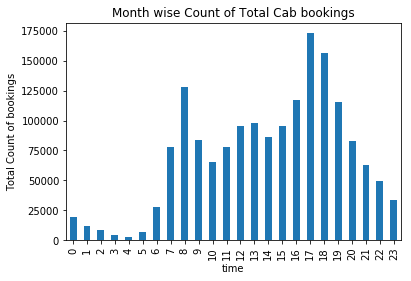

In [19]:
time=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
var = train.groupby(pd.Categorical(train['time'], categories=time, ordered=True)).Total_booking.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_ylabel('Total Count of bookings')
ax1.set_xlabel('time')
ax1.set_title("Month wise Count of Total Cab bookings")
var.plot(kind='bar')

#### We can observe that bookings are high during morning 8 which we can assume as office start time for various people and bookings are again high during evening 6 to 8 PM . The extremely low booking count at 4 AM tells us that people travel very less during that time.

In [20]:
train['time']=train['time'].astype('str').astype('int')
train['datetime']=train['datetime'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %H:%M'))

In [21]:
train.dtypes

datetime         datetime64[ns]
season                   object
holiday                   int64
workingday                int64
weather                  object
temp                    float64
atemp                   float64
humidity                float64
windspeed               float64
Total_booking             int64
date                     object
day                       int32
month                     int32
time                      int32
year                      int32
dtype: object

### Deleting Column Datetime and date as all the information is extracted from it

#### As no insights can be drawn from datetime column and necessary data is already extracted from, we are removing that column.

In [22]:
train.drop(['datetime','date'],axis=1,inplace=True)
train.dtypes

season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity         float64
windspeed        float64
Total_booking      int64
day                int32
month              int32
time               int32
year               int32
dtype: object

# Season Column

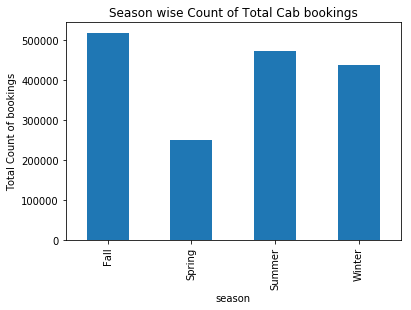

In [23]:
var = train.groupby(['season']).Total_booking.sum() #grouped sum of sales at Gender level
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Weather')
ax1.set_ylabel('Total Count of bookings')
ax1.set_title("Season wise Count of Total Cab bookings")
var.plot(kind='bar')

#### We have noticed that spring has low count of bookings when compared to other seasons because of the nice weather.  

# Weather Column

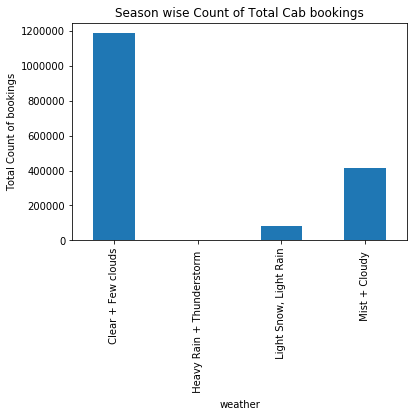

In [24]:
var = train.groupby(['weather']).Total_booking.sum() #grouped sum of sales at Gender level
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Weather')
ax1.set_ylabel('Total Count of bookings')
ax1.set_title("Season wise Count of Total Cab bookings")
var.plot(kind='bar')

#### We can observe that heavy rain+thunderstorm has very few cabs booked and clear + few clouds has maximum cabs booked. 

#### The interesting point is even when there is light snow + light rain, the bookings are very low.  

# atemp & temp column

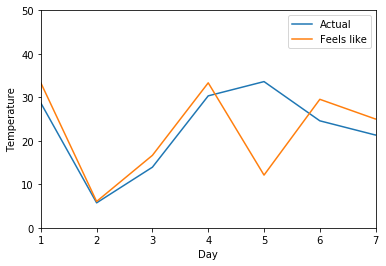

In [25]:
import numpy, matplotlib.pyplot as plt
plt.plot(train.temp, label='Actual')
plt.plot(train.atemp, label='Feels like')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.axis([1,7,0,50])
plt.legend()
plt.show()

#### The Actual temperature and feels like are close by to each other.

#### We have created another column by takeing average of temp and atemp , named it temperature.

In [26]:
train['temperature']=(train['temp']+train['atemp'])/2

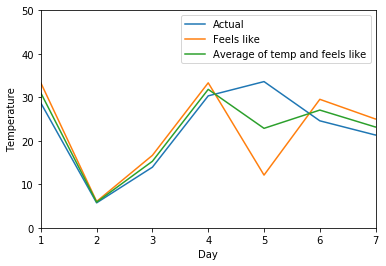

In [27]:
import numpy, matplotlib.pyplot as plt
plt.plot(train.temp, label='Actual')
plt.plot(train.atemp, label='Feels like')
plt.plot(train.temperature, label='Average of temp and feels like')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.axis([1,7,0,50])
plt.legend()
plt.show()

#### Here , we took the average of temp and atemp and created a new columnn. From the above plot, we can observe that it follows similar trend as other two. We can use the column temperature and remove "temp" and "atemp".

# Generating get_dummies for the training data

In [28]:
train=pd.get_dummies(train)
train.head(2)

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking,day,month,time,year,temperature,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,0,1,22.14,25.760,77.0,16.9979,504,2,5,19,2012,23.9500,0,0,1,0,1,0,0,0
1,0,1,28.70,33.335,79.0,19.0012,5,5,9,4,2012,31.0175,1,0,0,0,1,0,0,0


In [29]:
train.corr()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking,day,month,time,year,temperature,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
holiday,1.000000,-0.249755,-0.000165,-0.005526,-0.005765,0.011886,-0.004391,-0.019824,0.000578,0.003794,0.012039,-0.002970,0.023328,-0.006149,-0.039054,0.021882,-0.001229,-0.001835,-0.016256,0.011282
workingday,-0.249755,1.000000,0.032189,0.026168,-0.004783,0.015633,0.012285,0.016290,-0.001437,0.001717,-0.006705,0.029168,-0.007472,-0.005785,0.018932,-0.005749,-0.021183,0.007347,0.036539,0.000365
temp,-0.000165,0.032189,1.000000,0.984035,-0.070518,-0.019887,0.397456,0.024511,0.255916,0.146668,0.066451,0.995656,0.637149,-0.565047,0.190820,-0.267893,0.059766,-0.016519,-0.025797,-0.048270
atemp,-0.005526,0.026168,0.984035,1.000000,-0.047711,-0.060410,0.392754,0.020484,0.263176,0.141578,0.063042,0.996331,0.607166,-0.569505,0.203892,-0.246567,0.056922,-0.015495,-0.032296,-0.041268
humidity,-0.005765,-0.004783,-0.070518,-0.047711,1.000000,-0.314909,-0.317318,-0.015140,0.198341,-0.275681,-0.083208,-0.058869,0.063754,-0.158647,-0.029516,0.123205,-0.384558,0.013669,0.316089,0.221312
windspeed,0.011886,0.015633,-0.019887,-0.060410,-0.314909,1.000000,0.099752,0.029296,-0.147137,0.132997,-0.016614,-0.041167,-0.096909,0.121756,0.053082,-0.077034,0.022413,-0.009074,0.036818,-0.046385
Total_booking,-0.004391,0.012285,0.397456,0.392754,-0.317318,0.099752,1.000000,0.022549,0.170355,0.399947,0.266228,0.396589,0.141524,-0.238625,0.070649,0.024428,0.099981,-0.001712,-0.119645,-0.034736
day,-0.019824,0.016290,0.024511,0.020484,-0.015140,0.029296,0.022549,1.000000,0.004666,0.006313,-0.001171,0.022502,0.005610,-0.009758,0.007867,-0.003810,-0.004507,-0.001974,-0.013644,0.013225
month,0.000578,-0.001437,0.255916,0.263176,0.198341,-0.147137,0.170355,0.004666,1.000000,-0.006015,0.006556,0.260740,0.247176,-0.748287,-0.258244,0.753895,-0.016683,-0.017220,0.001188,0.017673
time,0.003794,0.001717,0.146668,0.141578,-0.275681,0.132997,0.399947,0.006313,-0.006015,1.000000,0.005712,0.144593,-0.001430,0.008273,-0.006787,0.000020,0.041023,0.009984,0.012126,-0.051846


#### From the newly created variables, temperature,time has high co-relation with target variable. 

## Modifying the Test Data

In [30]:
test=pd.read_csv(r"Dataset/test.csv")
test_target=pd.read_csv(r"Dataset/test_label.csv",header=None)
test['Total_booking']=test_target
test['date']=test.datetime.apply(lambda x:x.split()[0])
test['day']=test.date.apply(lambda x:calendar.day_name[datetime.datetime.strptime(x, "%m/%d/%Y").weekday()])
test['month']=test.date.apply(lambda x:calendar.month_name[datetime.datetime.strptime(x, "%m/%d/%Y").month])
test['time']=test.datetime.apply(lambda x:x.split()[1].split(":")[0])
test['year']=test.date.apply(lambda x:x.split("/")[2])
test['year']=test['year'].astype('str').astype('int')
test['day']=test.datetime.apply(lambda x:x.split(' ')[0].split("/")[1])
test['day']=test['day'].astype('str').astype('int')
test['month']=test.datetime.apply(lambda x:x.split(" ")[0].split("/")[0])
test['month']=test['month'].astype('str').astype('int')
test['time']=test['time'].astype('str').astype('int')
test['datetime']=test['datetime'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %H:%M'))
test.drop(['datetime','date'],axis=1,inplace=True)
test.dtypes
test['temperature']=(test['temp']+test['atemp'])/2


In [31]:
outliers=[]

def detect_outlier(data,column_name):
    data_std = data[column_name].std()
    data_mean = np.mean(data[column_name])
    outliers_cut_off = data_std * 3
    
    lower_limit  = data_mean - outliers_cut_off 
    upper_limit = data_mean + outliers_cut_off 
    
    
    # Generate outliers
    outliers=[]
    index_outliers=[]
    for outlier in data[column_name]:
        if outlier > upper_limit or outlier < lower_limit:
            outliers.append(outlier)
    
    return outliers

print("atemp column outliers :",len(detect_outlier(test,'atemp')))
print("temp column outliers :",len(detect_outlier(test,'temp')))
print("humidity column outliers :",len(detect_outlier(test,'humidity')))
print("windspeed column outliers :",len(detect_outlier(test,'windspeed')))



atemp column outliers : 0
temp column outliers : 0
humidity column outliers : 4
windspeed column outliers : 22


In [32]:
humidity_mean=np.mean(test['humidity'])
humidity_std = test['humidity'].std()
outliers_cut_off=humidity_std * 3
lower_limit  = humidity_mean - outliers_cut_off 
upper_limit = humidity_mean + outliers_cut_off

test['humidity'] = test['humidity'].apply(lambda x : humidity_mean if x > upper_limit or x < lower_limit else x )

windspeed_mean=np.mean(test['windspeed'])
windspeed_std = test['windspeed'].std()
outliers_cut_off=windspeed_std * 3
lower_limit  = windspeed_mean - outliers_cut_off 
upper_limit = windspeed_mean + outliers_cut_off

test['windspeed'] = test['windspeed'].apply(lambda x : windspeed_mean if x > upper_limit or x < lower_limit else x )


In [33]:
test=pd.get_dummies(test)
test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking,day,month,time,year,temperature,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,0,1,21.32,25.000,48.0,35.0008,256,10,5,11,2012,23.1600,0,0,1,0,1,0,0
1,0,0,23.78,27.275,64.0,7.0015,87,9,6,7,2012,25.5275,0,0,1,0,1,0,0
2,0,0,11.48,12.120,100.0,27.9993,11,6,3,20,2011,11.8000,0,1,0,0,0,1,0
3,0,1,25.42,28.790,83.0,0.0000,84,13,10,11,2011,27.1050,0,0,0,1,0,0,1
4,0,0,25.42,31.060,43.0,23.9994,668,2,6,12,2012,28.2400,0,0,1,0,1,0,0


In [34]:
train.columns,test.columns,train.shape,test.shape

(Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
        'Total_booking', 'day', 'month', 'time', 'year', 'temperature',
        'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter',
        'weather_ Clear + Few clouds', 'weather_ Heavy Rain + Thunderstorm ',
        'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy '],
       dtype='object'),
 Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
        'Total_booking', 'day', 'month', 'time', 'year', 'temperature',
        'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter',
        'weather_ Clear + Few clouds', 'weather_ Light Snow, Light Rain',
        'weather_ Mist + Cloudy '],
       dtype='object'),
 (8708, 20),
 (2178, 19))

## As the column "weather_ Heavy Rain + Thunderstorm" doesn't exist in test data, we can remove it from train data.

## Splitting the data into input and target variable

In [35]:
X=train.drop(['Total_booking','atemp','temp','day','weather_ Heavy Rain + Thunderstorm '],axis=1)
y=train[['Total_booking']]
X_test=test.drop(['Total_booking','atemp','temp','day'],axis=1)
y_test=test[['Total_booking']]

In [36]:
X.shape,X_test.shape,y.shape,y_test.shape

((8708, 15), (2178, 15), (8708, 1), (2178, 1))

In [37]:
X.columns,X_test.columns

(Index(['holiday', 'workingday', 'humidity', 'windspeed', 'month', 'time',
        'year', 'temperature', 'season_Fall', 'season_Spring', 'season_Summer',
        'season_Winter', 'weather_ Clear + Few clouds',
        'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy '],
       dtype='object'),
 Index(['holiday', 'workingday', 'humidity', 'windspeed', 'month', 'time',
        'year', 'temperature', 'season_Fall', 'season_Spring', 'season_Summer',
        'season_Winter', 'weather_ Clear + Few clouds',
        'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy '],
       dtype='object'))

### Linear Regression

### Ordinary Least Squares using statsmodels.api

In [38]:
import statsmodels.api as sm
X_ols = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X_ols).fit()
predictions_train = model.predict(X_ols) 

print_model = model.summary()
print(print_model)

X_test_ols = sm.add_constant(X_test)
predictions_test = model.predict(X_test_ols) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:          Total_booking   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     411.3
Date:                Sat, 24 Aug 2019   Prob (F-statistic):               0.00
Time:                        22:04:08   Log-Likelihood:                -55438.
No. Observations:                8708   AIC:                         1.109e+05
Df Residuals:                    8693   BIC:                         1.110e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

#### R square is also higher in this model. 

#### The p-value for column holiday and working day is greater than 0.05, so we accept the null hypothesis for these.

### Linear Regression using cross_val_score

In [39]:
lr = LinearRegression()
kfold = model_selection.KFold(n_splits=5, random_state=162)
cv_results = model_selection.cross_val_score(lr, X, y, cv=kfold, scoring='r2')
print("training data score: ",cv_results.mean())

lr = LinearRegression()
kfold = model_selection.KFold(n_splits=5, random_state=162)
cv_results = model_selection.cross_val_score(lr, X_test, y_test, cv=kfold, scoring='r2')
print("testing data score:" ,cv_results.mean())

training data score:  0.39417643732924307
testing data score: 0.39538693576825173


#### Rsquare is higher here than OLS model

### Linear Regression with grid search

In [41]:
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=4)
grid.fit(X, y)
print("training data r2 / variance : ", grid.best_score_)
grid.fit(X_test, y_test)
print("testing data r2 / variance : ", grid.best_score_)
# print("Residual sum of squares: %.2f",np.mean((grid.predict(X_test) - y_test) ** 2))

training data r2 / variance :  0.39441071574572667
testing data r2 / variance :  0.39527729989826815


#### Rsquare is lower here than cross_val_score model

### Feature Importance using RandomForestClassifier

[0.0070712  0.02573765 0.19861013 0.18819834 0.06357031 0.23008709
 0.02340738 0.20704179 0.00504077 0.00120924 0.00644958 0.00514123
 0.01551861 0.0076336  0.01528308]


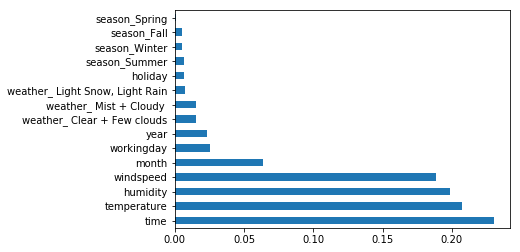

In [42]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(22).plot(kind='barh')
plt.show()

#### As all columns show certain importance over the target column, lets not eliminate any column yet.

## Recursive Feature Elimination

In [45]:
from sklearn.feature_selection import RFE
a = np.array(list(X.columns))
# create a base classifier used to evaluate a subset of attributes
model = LinearRegression()

# create the RFE model and select 3 attributes
rfe = RFE(model, 6)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
print(rfe.support_)
print('Selected features:', a[rfe.support_])
print(a[~rfe.support_])
print('Feature ranking', rfe.ranking_)

train_rfe=X[['season_Fall','season_Winter','weather_ Clear + Few clouds','year','temperature']]
model.fit(train_rfe,y)

X_testrfe=X_test[['season_Fall','season_Winter','weather_ Clear + Few clouds','year','temperature']]
predictions = model.predict(X_testrfe)
print ("r2/variance : ", model.score(X_testrfe,y_test))
print("Residual sum of squares: %.2f", np.mean((model.predict(X_testrfe) - y_test) ** 2))

[False False False False False False  True  True  True False False  True
  True  True False]
Selected features: ['year' 'temperature' 'season_Fall' 'season_Winter'
 'weather_ Clear + Few clouds' 'weather_ Light Snow, Light Rain']
['holiday' 'workingday' 'humidity' 'windspeed' 'month' 'time'
 'season_Spring' 'season_Summer' 'weather_ Mist + Cloudy ']
Feature ranking [ 7 10  8  9  5  2  1  1  1  3  4  1  1  1  6]
r2/variance :  0.23149987825275642
Residual sum of squares: %.2f Total_booking    24731.145062
dtype: float64


### RFE doesn't give better rsquare

In [46]:
X.shape,X_test.shape,y.shape,y_test.shape

((8708, 15), (2178, 15), (8708, 1), (2178, 1))

# Improving the SCORE using ensemble methods

### GradientBoostingRegressor

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
model=GradientBoostingRegressor(random_state=216)
model.fit(X,y)
print("r2 score :",model.score(X,y))

pred_train=model.predict(X)
print("RMSE of training data:",np.sqrt(mean_squared_error(y,pred_train)))

pred_test=model.predict(X_test)
print("RMSE of testing data:",np.sqrt(mean_squared_error(y_test,pred_test)))

r2 score : 0.8737746510697225
RMSE of training data: 64.49854151002235
RMSE of testing data: 65.91580302249068


#### The model looks good with very less difference between RMSE of training and testing data.

### XGBoost Regressor

In [48]:
import xgboost as xgb
model=xgb.XGBRegressor(random_state=216)
model.fit(X,y)
print("r2 score :",model.score(X,y))

pred_train=model.predict(X)
print("RMSE of training data:",np.sqrt(mean_squared_error(y,pred_train)))

pred_test=model.predict(X_test)
print("RMSE of testing data:",np.sqrt(mean_squared_error(y_test,pred_test)))

[22:15:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score : 0.8645343001337875
RMSE of training data: 66.81766222302234
RMSE of testing data: 69.45952106620152


#### The model looks good. 

### RandomForest Regressor

In [49]:
model=RandomForestRegressor(random_state=216)
model.fit(X,y)
print("r2 score :",model.score(X,y))

pred_train=model.predict(X)
print("RMSE of training data:",np.sqrt(mean_squared_error(y,pred_train)))

pred_test=model.predict(X_test)
print("RMSE of testing data:",np.sqrt(mean_squared_error(y_test,pred_test)))

r2 score : 0.9877126312412203
RMSE of training data: 20.12361733359932
RMSE of testing data: 46.97955065075117


#### The model maybe underfitting.

## Improving the ensemble models with parameter tuning with GridSearchCV

#### GradientBoost

In [50]:
%%time
params={'n_estimators':[100,300],'learning_rate':[0.2,0.5]}
model=GradientBoostingRegressor(random_state=216)
gcv=GridSearchCV(estimator=model,param_grid=params,scoring='neg_mean_squared_error',n_jobs=1)
gcv.fit(X,y)
print("GSCV Gradient Boost best parameters",gcv.best_params_)
print(gcv.best_score_)

GSCV Gradient Boost best parameters {'learning_rate': 0.5, 'n_estimators': 300}
-2532.124759931561
Wall time: 31.3 s


In [51]:
model=GradientBoostingRegressor(n_estimators= 300,learning_rate=0.5,random_state=216)
model.fit(X,y)
print("r2 score :",model.score(X,y))

pred_train=model.predict(X)
print("RMSE of training data:",np.sqrt(mean_squared_error(y,pred_train)))

pred_test=model.predict(X_test)
print("RMSE of testing data:",np.sqrt(mean_squared_error(y_test,pred_test)))

r2 score : 0.9522768691878888
RMSE of training data: 39.658936855842505
RMSE of testing data: 47.829805732874554


#### R square vale of testing data incrased from 0.85 to 0.95 with parameter tuning using grid search.

In [52]:
%%time
params={'n_estimators':[200,300],'learning_rate':[0.2,0.5]}
model=xgb.XGBRegressor(random_state=216)
gcv=GridSearchCV(estimator=model,param_grid=params,scoring='neg_mean_squared_error',n_jobs=1)
gcv.fit(X,y)
print("GSCV Gradient Boost best parameters",gcv.best_params_)
print(gcv.best_score_)

[22:16:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:16:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:16:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:16:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:16:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:16:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:16:37] WARNI

In [53]:
model=xgb.XGBRegressor(n_estimators= 300,learning_rate=0.5,random_state=216)
model.fit(X,y)
print("r2 score :",model.score(X,y))

pred_train=model.predict(X)
print("RMSE of training data:",np.sqrt(mean_squared_error(y,pred_train)))

pred_test=model.predict(X_test)
print("RMSE of testing data:",np.sqrt(mean_squared_error(y_test,pred_test)))

[22:17:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score : 0.9508141202067887
RMSE of training data: 40.26213736581918
RMSE of testing data: 48.281567421206326


#### R square vale of testing data incrased from 0.86 to 0.95 with parameter tuning using grid search. A significant increase due to grid search.

In [54]:
%%time
params={'n_estimators':[200,300]}
model=RandomForestRegressor(random_state=216)
gcv=GridSearchCV(estimator=model,param_grid=params,scoring='neg_mean_squared_error',n_jobs=1)
gcv.fit(X,y)
print("GSCV Gradient Boost best parameters",gcv.best_params_)
print(gcv.best_score_)

GSCV Gradient Boost best parameters {'n_estimators': 300}
-2115.327287216555
Wall time: 2min 13s


In [55]:
model=RandomForestRegressor(n_estimators= 300,random_state=216)
model.fit(X,y)
print("r2 score :",model.score(X,y))

pred_train=model.predict(X)
print("RMSE of training data:",np.sqrt(mean_squared_error(y,pred_train)))

pred_test=model.predict(X_test)
print("RMSE of testing data:",np.sqrt(mean_squared_error(y_test,pred_test)))

r2 score : 0.9916503691091998
RMSE of training data: 16.58861939028858
RMSE of testing data: 43.07201319055383


#### R square vale of testing data incrased from 0.98 to with parameter 0.99 tuning using grid search but with same RMSE of training and testing data. 

#### Finally, the RandomForestRegressor model performed well on our data with 0.99 explained variance.
#### 16.58 root mean squared error on training data. 
#### 43.07 root mean squared error on testing data.